## This Notebook gives performs Data Splitting and Resizing of Images (to load in Google Drive - Colab)

#  <font color='red'>Table of Contents</font>

[6. Train Validation Split](#section6)<br>
[7. Resize and save](#section7)<br>
[8. Image Pre Processing and save](#section8)<br>

In [2]:
# Basic Libraries
import multiprocessing
from multiprocessing.pool import ThreadPool
import warnings
warnings.filterwarnings("ignore")

import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook
from prettytable import PrettyTable

print('CWD is', os.getcwd())

# Visualization Libraries
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False  # %matplotlib inline not needed in VS Code or Jupyter modern versions

# Image Libraries
from PIL import Image
import cv2

# Scikit-learn Utilities
from sklearn.model_selection import train_test_split

# ✅ Deep Learning Libraries (from tensorflow.keras)
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras import optimizers, Model, Sequential
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


CWD is d:\MTech Project\Project


#  <a id = 'section6'> <font color='red'>  6. Train Validation Split</font> </a>

In [5]:
import pandas as pd
import os

def load_data():
    base_path = r"D:\MTech Project\Dataset\Unlabeled Data"
    
    # Load CSVs
    df_train = pd.read_csv(os.path.join(base_path, "train.csv"))
    df_test = pd.read_csv(os.path.join(base_path, "test.csv"))

    # Image directories
    train_dir = os.path.join(base_path, 'train_images')
    test_dir = os.path.join(base_path, 'test_images')
    
    # Add file path and filename columns
    df_train['file_path'] = df_train['id_code'].apply(lambda x: os.path.join(train_dir, f"{x}.png"))
    df_test['file_path'] = df_test['id_code'].apply(lambda x: os.path.join(test_dir, f"{x}.png"))
    
    df_train['file_name'] = df_train['id_code'].apply(lambda x: f"{x}.png")
    df_test['file_name'] = df_test['id_code'].apply(lambda x: f"{x}.png")
    
    df_train['diagnosis'] = df_train['diagnosis'].astype(str)
    return df_train, df_test


In [6]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train.head(6)

(3662, 4) (1928, 3) 



,id_code,diagnosis,file_path,file_name
0,000c1434d8d7,2,D:\MTech Project\Dataset\Unlabeled Data\train_...,000c1434d8d7.png
1,001639a390f0,4,D:\MTech Project\Dataset\Unlabeled Data\train_...,001639a390f0.png
2,0024cdab0c1e,1,D:\MTech Project\Dataset\Unlabeled Data\train_...,0024cdab0c1e.png
3,002c21358ce6,0,D:\MTech Project\Dataset\Unlabeled Data\train_...,002c21358ce6.png
4,005b95c28852,0,D:\MTech Project\Dataset\Unlabeled Data\train_...,005b95c28852.png
5,0083ee8054ee,4,D:\MTech Project\Dataset\Unlabeled Data\train_...,0083ee8054ee.png


In [7]:
df_train_train,df_train_valid = train_test_split(df_train,test_size = 0.2)
print(df_train_train.shape,df_train_valid.shape)

(2929, 4) (733, 4)


In [8]:
'''This Function Plots a Bar plot of output Classes Distribution'''

def plot_classes(df,title):
    df_group = pd.DataFrame(df.groupby('diagnosis').agg('size').reset_index())
    df_group.columns = ['diagnosis','count']

    sns.set(rc={'figure.figsize':(10,5)}, style = 'whitegrid')
    sns.barplot(x = 'diagnosis',y='count',data = df_group,palette = "Blues_d")
    plt.title('Output Class Distribution ' + str(title))
    plt.show() 

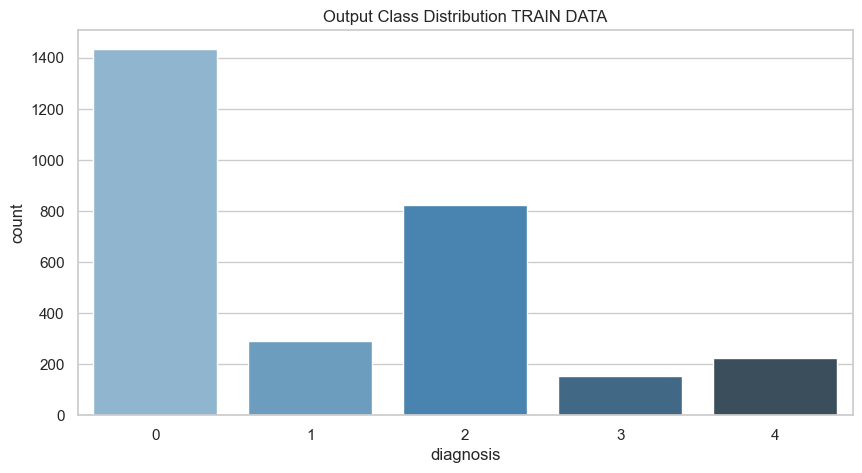

In [9]:
plot_classes(df_train_train,"TRAIN DATA")

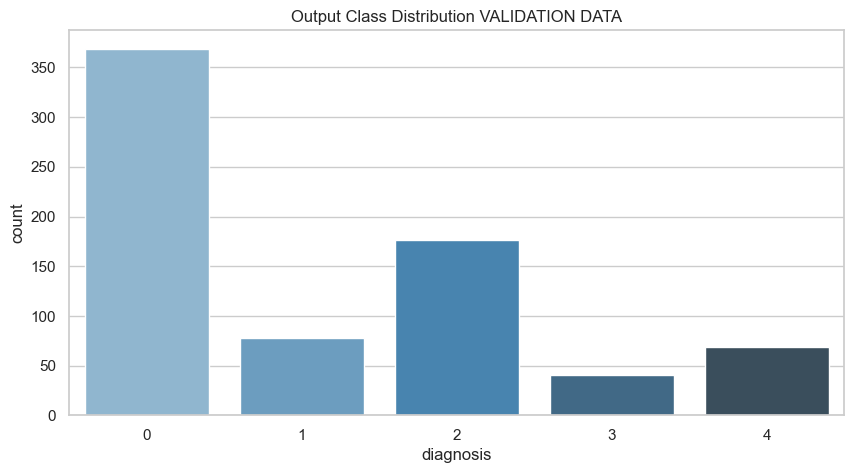

In [10]:
plot_classes(df_train_valid,'VALIDATION DATA')

In [17]:
'''
file = open('df_train_train', 'wb')
pickle.dump(df_train_train, file)
file.close()

file = open('df_train_test', 'wb')
pickle.dump(df_train_test, file)
file.close()
'''

"\nfile = open('df_train_train', 'wb')\npickle.dump(df_train_train, file)\nfile.close()\n\nfile = open('df_train_test', 'wb')\npickle.dump(df_train_test, file)\nfile.close()\n"

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import pickle

def load_data():
    base_path = r"D:\MTech Project\Dataset\Unlabeled Data"
    
    df_train = pd.read_csv(os.path.join(base_path, "train.csv"))
    df_test = pd.read_csv(os.path.join(base_path, "test.csv"))

    train_dir = os.path.join(base_path, 'train_images')
    test_dir = os.path.join(base_path, 'test_images')
    
    df_train['file_path'] = df_train['id_code'].apply(lambda x: os.path.join(train_dir, f"{x}.png"))
    df_test['file_path'] = df_test['id_code'].apply(lambda x: os.path.join(test_dir, f"{x}.png"))
    
    df_train['file_name'] = df_train['id_code'].apply(lambda x: f"{x}.png")
    df_test['file_name'] = df_test['id_code'].apply(lambda x: f"{x}.png")
    
    df_train['diagnosis'] = df_train['diagnosis'].astype(str)
    return df_train, df_test

# Load and split
df_train, df_test = load_data()
df_train_train, df_train_test = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['diagnosis'])

# Save
save_path = r"D:\MTech Project\Dataset\Pickled Data"
os.makedirs(save_path, exist_ok=True)

with open(os.path.join(save_path, 'df_train_train.pkl'), 'wb') as f:
    pickle.dump(df_train_train, f)

with open(os.path.join(save_path, 'df_train_test.pkl'), 'wb') as f:
    pickle.dump(df_train_test, f)


In [19]:
# Set your correct pickle file directory
load_path = r"D:\MTech Project\Dataset\Pickled Data"

# Load training split
with open(os.path.join(load_path, 'df_train_train.pkl'), 'rb') as file:
    df_train_train = pickle.load(file)

# Load testing split
with open(os.path.join(load_path, 'df_train_test.pkl'), 'rb') as file:
    df_train_test = pickle.load(file)


In [24]:

# Set base paths
base_pickle_path = r"D:\MTech Project\Dataset\Pickled Data"
image_dir = r"D:\MTech Project\Dataset\Preprocessed"

# Load pickled DataFrames
with open(os.path.join(base_pickle_path, 'df_train_train.pkl'), 'rb') as file:
    df_train_train = pickle.load(file)

with open(os.path.join(base_pickle_path, 'df_train_test.pkl'), 'rb') as file:
    df_train_test = pickle.load(file)

# Print dataframe shapes
print("Train/Test DataFrame shapes:")
print(df_train_train.shape, df_train_test.shape)

# Image folders
train_image_folder = os.path.join(image_dir, 'train_images_resized_preprocessed')
test_image_folder = os.path.join(image_dir, 'test_images_resized_preprocessed')

# Safely check and print file counts
if os.path.exists(train_image_folder) and os.path.exists(test_image_folder):
    print("Number of preprocessed images:")
    print(len(os.listdir(train_image_folder)), len(os.listdir(test_image_folder)))



Train/Test DataFrame shapes:
(2929, 4) (733, 4)


#  <a id = 'section7'> <font color='red'>  7. Resize and Save</font> </a>

In [25]:
IMG_SIZE  = 512

In [26]:
'''Function loads an image from Folder , Resizes and saves in another directory '''

def image_resize_save(file):
    input_filepath = os.path.join('./','train_images','{}.png'.format(file))
    output_filepath = os.path.join('./','valid_images_resized','{}.png'.format(file))
    img = cv2.imread(input_filepath)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))
#image_resize_save(df_train.id_code.iloc[201])

In [27]:
'''This Function uses Multi processing for faster saving of images into folder'''

def multiprocess_image_downloader(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(image_resize_save, imgs)
    return results

##### Summary - Using Multiprocessing (6 cores), we managed to resize and save images within 10 minutes, and reducing IMG_SIZE to 512, thereby reducing disk-space from 20 GB (earlier) to 1 GB (after resizing).

#  <a id = 'section8'> <font color='red'>  8. Image Pre Processing and save</font> </a>

In [29]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

def preprocess_image(file):
    input_filepath = os.path.join('./','test_images_resized','{}.png'.format(file))
    output_filepath = os.path.join('./','test_images_resized_preprocessed','{}.png'.format(file))
    
    img = cv2.imread(input_filepath)
    img = circle_crop(img) 
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [30]:
'''This Function uses Multi processing for faster saving of images into folder'''

def multiprocess_image_processor(process:int, imgs:list):
    """
    Inputs:
        process: (int) number of process to run
        imgs:(list) list of images
    """
    print(f'MESSAGE: Running {process} process')
    results = ThreadPool(process).map(preprocess_image, imgs)
    return results